{}


Text(0.5, 1.0, 'Pichu and Pikachu analyser')

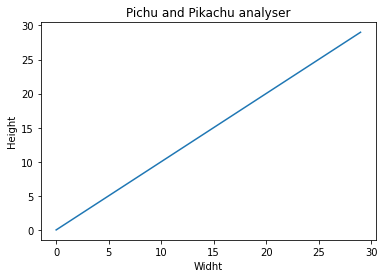

In [23]:
import matplotlib.pyplot as plt

pichuFiles = "files/pichu.txt"
pikachuFiles = "files/pikachu.txt"

with open(pichuFiles, "r") as pichu, open(pikachuFiles, "r") as pikachu:
    pichuData = pichu.read()
    pikachuData = pikachu.read()


plt.plot(range(0, 30))
plt.xlabel("Widht")
plt.ylabel("Height")
plt.title("Pichu and Pikachu analyser")